In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

import sys
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
assert hasattr(tf, "function")

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist # import dataset
(images, targets), (images_test, targets_test) = fashion_mnist.load_data() #split le dataset deux tuples(train, test) en images | label

# séparer les données en données de test et d'entraînement
images = images[:10000]
targets = targets[:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784) #transforme 2d to 1d vector
images = images.astype(float) #vérifie le type des données du vector
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler() #normalise les données afin de tendre vers une valeur facilement convergente
# empêche les effets d'echelles , les valeurs dominantes ou a priori au premier tour d'apprentissage
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

#### BEST façon de faire
images_train, images_test, targets_train, targets_test = train_test_split(
    images, targets, test_size=0.3, random_state=1)


print(images.shape) #format output (nb_données, size_x, size_y)
print(targets.shape)


(10000, 784)
(10000,)


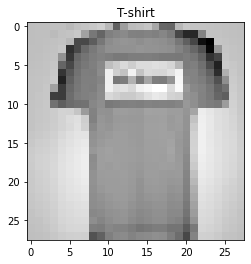

In [24]:
targets_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "bag", "AnkleBoot"] # met un nom sur l'id des labels

#Test sur la ie image
i = 1
plt.imshow(np.reshape(images[i], (28, 28)), cmap="binary") # imshow(img_to_print, cmap=rgba, noir et blanc)
plt.title(targets_names[targets[i]]) # titre l'image de son label
plt.show()

In [25]:
#Réseau: data --> 1 layer de 256 neurones(28 * 28 connexions avec l'image) --> 2e layer de 128 neurones avec 256 connexions avec les neurones du précedent neurone (chaque neuro) --> 9 neurones de sortie( chaque neurone prédit une catégorie)

#Chaque image est stockée en tab2dim

#model = tf.keras.models.Sequential() #crée le modèle
#model.add(tf.keras.layers.Flatten(input_shape=[28,28])) #Flatten : transforme le 2tabs en un vector


In [26]:
model = tf.keras.models.Sequential() #crée le modèle

# Add layers of Dense Type --> format(nb_neurones, activation_func)
model.add(tf.keras.layers.Dense(256, activation="relu")) 
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) #softmax = distribution de probabilité

model_output = model.predict(images[0:1]) # predict(data) --> execute la ou les opérations added
print(model_output, targets[0:1])
model.summary() #affiche le réseau crée


[[0.0284228  0.08939645 0.04701892 0.21583024 0.07075959 0.38022563
  0.0241494  0.01126906 0.07722739 0.05570042]] [9]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model

model.compile(
    loss="sparse_categorical_crossentropy", # fonction de minimisation de l'erreur
    optimizer="sgd", # fonction d'optimisation (ici descente de gradient)
    metrics=["accuracy"] # donnée à afficher, à récupérer
)

In [28]:
#Train le model
history = model.fit(images_train, targets_train, epochs=10, validation_split=0.2) #combien de fois on passe, 20% de jeu de validation sur le dataset

Epoch 1/10
175/175 [==============================] - 1s 5ms/step - loss: 1.3169 - accuracy: 0.5746 - val_loss: 0.6703 - val_accuracy: 0.7614
Epoch 2/10
175/175 [==============================] - 1s 3ms/step - loss: 0.5865 - accuracy: 0.7955 - val_loss: 0.5766 - val_accuracy: 0.7886
Epoch 3/10
175/175 [==============================] - 1s 3ms/step - loss: 0.4885 - accuracy: 0.8306 - val_loss: 0.5333 - val_accuracy: 0.7929
Epoch 4/10
175/175 [==============================] - 1s 3ms/step - loss: 0.4334 - accuracy: 0.8551 - val_loss: 0.5178 - val_accuracy: 0.8050
Epoch 5/10
175/175 [==============================] - 1s 3ms/step - loss: 0.4006 - accuracy: 0.8603 - val_loss: 0.4976 - val_accuracy: 0.8114
Epoch 6/10
175/175 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8723 - val_loss: 0.4860 - val_accuracy: 0.8164
Epoch 7/10
175/175 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8856 - val_loss: 0.4770 - val_accuracy: 0.8243
Epoch 

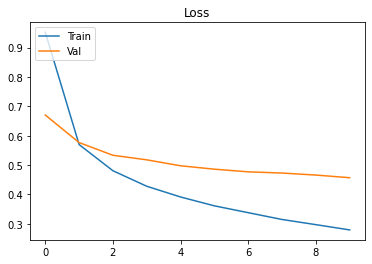

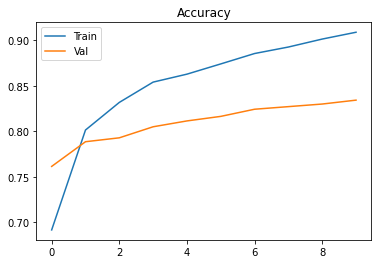

In [29]:
#Afficher l'output

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [30]:
model.evaluate(images_test, targets_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8460


[0.44078880548477173, 0.8460000157356262]